In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [3]:
with open('cope_data\ssp585_time_series.pkl', 'rb') as f:
    cope_data = pkl.load(f)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mirco\AppData\Local\Temp\ipykernel_2300\1191213698.py:1: SyntaxWarning: invalid escape sequence '\s'
  with open('cope_data\ssp585_time_series.pkl', 'rb') as f:


In [16]:
cope_data['CanESM5-1']

{'r11i1p2f1': array([[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [-1.70407824, -1.70351919, -1.70404518, ..., -1.70833165,
          -1.70618536, -1.70486779],
         [-1.71556756, -1.7145451 , -1.71360421, ..., -1.72304425,
          -1.72097053, -1.71964714],
         [-1.72987617, -1.72966569, -1.72942761, ..., -1.73245707,
          -1.73134178, -1.73003917]],
 
        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [-1.7369552

In [15]:
cope_data['E3SM-1-0']

{'r1i1p1f1': array([[[ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         ...,
         [-1.75345031, -1.7528911 , -1.75165726, ..., -1.75760332,
          -1.75537129, -1.75370026],
         [-1.76880874, -1.76822066, -1.7679744 , ..., -1.77028009,
          -1.76996626, -1.76926552],
         [-1.76583061, -1.7656415 , -1.7651633 , ..., -1.76668733,
          -1.76629412, -1.76584013]],
 
        [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         ...,
         [-1.75017026

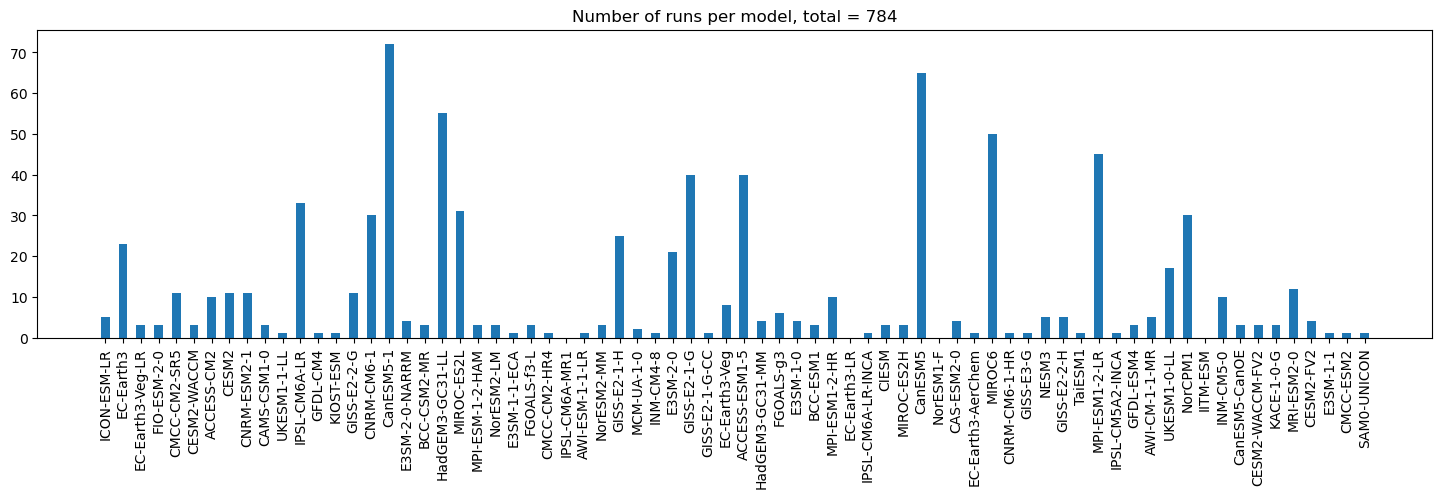

In [4]:
from plots import plot_histogram_runs

plot_histogram_runs(cope_data)

In [18]:
from utils import prune

pruned_data = prune(cope_data, min_runs=5)

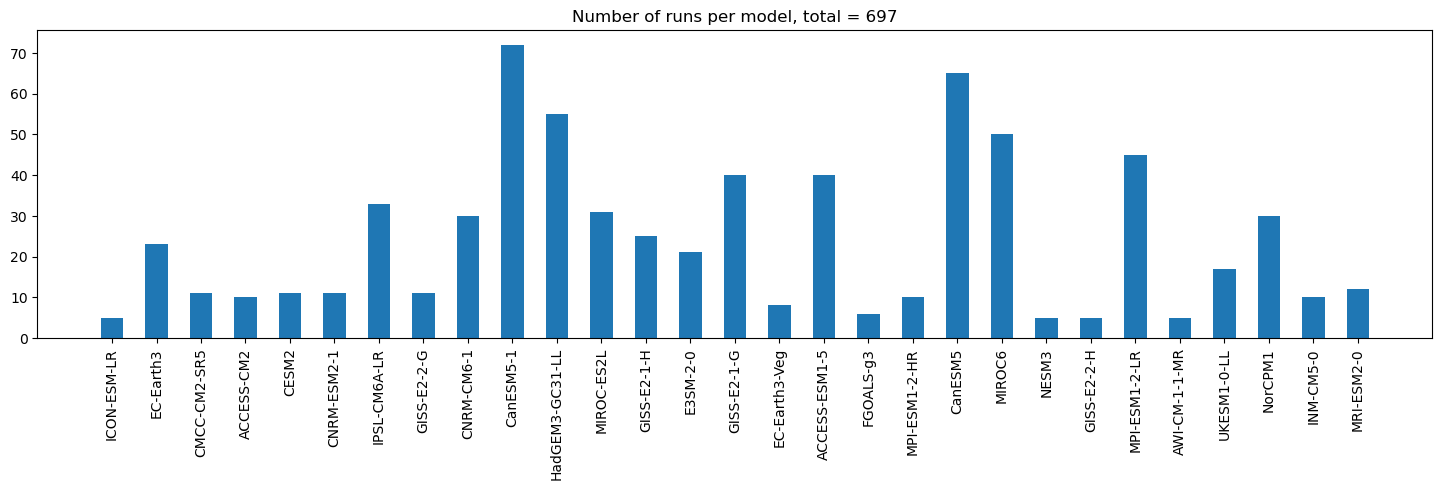

In [19]:
plot_histogram_runs(pruned_data)

In [17]:
#model E3SM-1-0 has ones instead of nans !!!

In [21]:
from utils import normalize


X, Y = [], []

for model in pruned_data.keys():
    normalized_grids, mean_forced_responses = normalize(pruned_data, model)
    for grid_timeserie in normalized_grids:
        for grid, mean_forced_response in zip(grid_timeserie, mean_forced_responses):
            X.append(grid.flatten())
            Y.append(mean_forced_response.flatten())

X, Y = np.array(X), np.array(Y)

In [22]:
X.shape

(23698, 10368)

In [23]:
Y.shape

(23698, 10368)

In [10]:
len(X[0])

10368

# Linear Regression

In [5]:
import torch

ModuleNotFoundError: No module named 'torch'

In [25]:
# Create X and Y for training
X = torch.tensor(X)
Y = torch.tensor(Y)

W = torch.linalg.lstsq(X, Y).solution

RuntimeError: false INTERNAL ASSERT FAILED at "C:\\actions-runner\\_work\\pytorch\\pytorch\\pytorch\\aten\\src\\ATen\\native\\BatchLinearAlgebra.cpp":1602, please report a bug to PyTorch. torch.linalg.lstsq: Argument 4 has illegal value. Most certainly there is a bug in the implementation calling the backend library.